In [1]:
from nnsynth.neural_net import create_skorch_net

In [2]:
from nnsynth.datasets import XorDataset

In [3]:
from nnsynth.evaluate import EvaluateDecisionBoundary

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
xor_dataset_instance = XorDataset(center=10, std=3, samples=1000, test_size=0.4, random_seed=42)

In [6]:
net = create_skorch_net(input_size=2, hidden_size=4, num_classes=2, epochs=100, learning_rate=1e-3, random_seed=44)

In [7]:
X_train, y_train, X_test, y_test = xor_dataset_instance.get_splitted_data()

In [8]:
def sanity():
    print("X_train shape: ", X_train.shape)
    print("y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_test shape: ", y_test.shape)

In [9]:
sanity()

X_train shape:  (2400, 2)
y_train shape:  (2400,)
X_test shape:  (1600, 2)
y_test shape:  (1600,)


In [10]:
net.fit(X_train, y_train)

  epoch    train_loss     dur
-------  ------------  ------
      1        0.5061  0.0313
      2        0.4247  0.0339
      3        0.3585  0.0311
      4        0.3031  0.0307
      5        0.2560  0.0272
      6        0.2165  0.0290


/home/deebee/PycharmProjects/NNSynthesizer/nnsynth/neural_net.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.softmax(out)


      7        0.1839  0.0314
      8        0.1570  0.0309
      9        0.1348  0.0308
     10        0.1163  0.0345
     11        0.1011  0.0335
     12        0.0884  0.0291
     13        0.0779  0.0284
     14        0.0691  0.0291
     15        0.0618  0.0298
     16        0.0556  0.0298
     17        0.0503  0.0311
     18        0.0458  0.0294
     19        0.0420  0.0295
     20        0.0386  0.0282
     21        0.0357  0.0283
     22        0.0331  0.0302
     23        0.0309  0.0289
     24        0.0288  0.0301
     25        0.0271  0.0287
     26        0.0255  0.0295
     27        0.0240  0.0297
     28        0.0227  0.0297
     29        0.0216  0.0289
     30        0.0205  0.0343
     31        0.0196  0.0291
     32        0.0187  0.0339
     33        0.0179  0.0294
     34        0.0171  0.0320
     35        0.0164  0.0316
     36        0.0158  0.0292
     37        0.0152  0.0282
     38        0.0147  0.0322
     39        0.0142  0.0306
     40   

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ClassificationNet(
    (layer1): Linear(in_features=2, out_features=4, bias=True)
    (relu): ReLU()
    (layer2): Linear(in_features=4, out_features=2, bias=True)
    (softmax): Softmax()
  ),
)

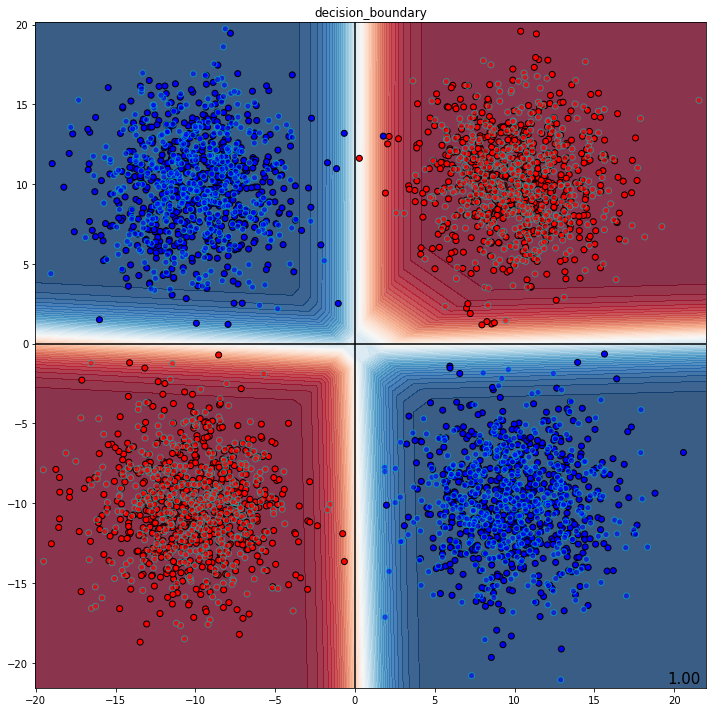

In [11]:
evaluator = EvaluateDecisionBoundary(net, None, xor_dataset_instance, 0.1, 50, False)
evaluator.plot()

In [12]:
net.optimizer

torch.optim.adam.Adam

In [13]:
type(net)

skorch.classifier.NeuralNetClassifier

In [14]:
net.save_params(f_params='model.pkl',f_optimizer='optimizer.pkl', f_history='history.json')

In [15]:
cat history.json

[{"train_loss_best": true, "epoch": 1, "train_loss": 0.5060642532507579, "dur": 0.03129720687866211, "batches": [{"train_batch_size": 128, "train_loss": 0.5257080793380737}, {"train_batch_size": 128, "train_loss": 0.5131883025169373}, {"train_batch_size": 128, "train_loss": 0.5812387466430664}, {"train_batch_size": 128, "train_loss": 0.5598193407058716}, {"train_batch_size": 128, "train_loss": 0.534552812576294}, {"train_batch_size": 128, "train_loss": 0.5819198489189148}, {"train_batch_size": 128, "train_loss": 0.504650354385376}, {"train_batch_size": 128, "train_loss": 0.45218873023986816}, {"train_batch_size": 128, "train_loss": 0.4898798167705536}, {"train_batch_size": 128, "train_loss": 0.58225017786026}, {"train_batch_size": 128, "train_loss": 0.5470269322395325}, {"train_batch_size": 128, "train_loss": 0.49409931898117065}, {"train_batch_size": 128, "train_loss": 0.4923752248287201}, {"train_batch_size": 128, "train_loss": 0.4472357928752899}, {"train_batch_size": 128, "train_lo

In [16]:
import pickle

In [19]:
with open('good-network.NeuralNetClassifier.pkl', 'wb') as handle:
    pickle.dump(net, handle)

In [20]:
with open('good-network-data.XorDataset.pkl', 'wb') as handle:
    pickle.dump(xor_dataset_instance, handle)

In [22]:
net.get_params()

{'batch_size': 128,
 'callbacks': None,
 'callbacks_': [('epoch_timer',
   <skorch.callbacks.logging.EpochTimer at 0x7fbf05591160>),
  ('train_loss', <skorch.callbacks.scoring.BatchScoring at 0x7fbf055912b0>),
  ('valid_loss', <skorch.callbacks.scoring.BatchScoring at 0x7fbf05591278>),
  ('valid_acc', <skorch.callbacks.scoring.EpochScoring at 0x7fbf05591240>),
  ('print_log', <skorch.callbacks.logging.PrintLog at 0x7fbf05591358>)],
 'callbacks__epoch_timer': <skorch.callbacks.logging.EpochTimer at 0x7fbf042b0748>,
 'callbacks__print_log': <skorch.callbacks.logging.PrintLog at 0x7fbf042b0a20>,
 'callbacks__print_log__floatfmt': '.4f',
 'callbacks__print_log__keys_ignored': None,
 'callbacks__print_log__sink': <function print>,
 'callbacks__print_log__stralign': 'right',
 'callbacks__print_log__tablefmt': 'simple',
 'callbacks__train_loss': <skorch.callbacks.scoring.BatchScoring at 0x7fbf042b0780>,
 'callbacks__train_loss__lower_is_better': True,
 'callbacks__train_loss__name': 'train_lo